In [21]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from catboost import Pool, cv, CatBoostClassifier

In [3]:
milk_data = pd.read_csv("./milknew.csv")

In [8]:
milk_data.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


<AxesSubplot:ylabel='Temprature'>

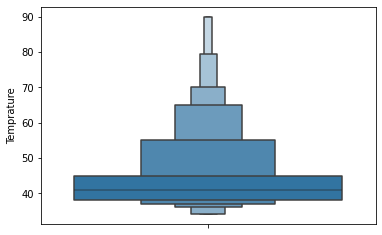

In [9]:
sns.boxenplot(y=milk_data["Temprature"])

In [16]:
X = milk_data.iloc[:,:-1]
y = milk_data.iloc[:, -1]

In [23]:
y = y.astype("category").cat.codes

In [24]:
X_train, X_val, y_train, y_val = train_test_split(X,y)

In [28]:
milk_data = Pool(X, y, cat_features=list(range(2,7)))

In [36]:
model = CatBoostClassifier()

model.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=20)

Learning rate set to 0.107479
0:	learn: 0.9866062	test: 0.9937850	best: 0.9937850 (0)	total: 780us	remaining: 779ms
1:	learn: 0.8727538	test: 0.8800634	best: 0.8800634 (1)	total: 1.47ms	remaining: 734ms
2:	learn: 0.7774491	test: 0.7846111	best: 0.7846111 (2)	total: 2.13ms	remaining: 710ms
3:	learn: 0.7044398	test: 0.7141265	best: 0.7141265 (3)	total: 2.78ms	remaining: 693ms
4:	learn: 0.6377043	test: 0.6476372	best: 0.6476372 (4)	total: 3.46ms	remaining: 688ms
5:	learn: 0.5905154	test: 0.6019480	best: 0.6019480 (5)	total: 3.9ms	remaining: 647ms
6:	learn: 0.5424009	test: 0.5529607	best: 0.5529607 (6)	total: 4.51ms	remaining: 640ms
7:	learn: 0.4976386	test: 0.5070230	best: 0.5070230 (7)	total: 5.25ms	remaining: 652ms
8:	learn: 0.4597235	test: 0.4700139	best: 0.4700139 (8)	total: 5.94ms	remaining: 654ms
9:	learn: 0.4239998	test: 0.4351773	best: 0.4351773 (9)	total: 6.58ms	remaining: 652ms
10:	learn: 0.3937322	test: 0.4050824	best: 0.4050824 (10)	total: 7.2ms	remaining: 648ms
11:	learn: 0.3

In [46]:
from sklearn.metrics import accuracy_score

preds = model.predict(X_val)

In [48]:
accuracy_score(y_val, preds)

0.9924528301886792